1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Divide the dataset into 2 training and test sets
4. Use Pipeline
    4. a. Use scaler and dimensional reduction (if it is necessary).
    4. b. Use suitable Naive Bayes for this problem. 
5. Perform model on training set and test set using gridsearch CV
6. Measure performance of the model.
7. Which metric is your main metric for this problem and why? What are your scaler, dimensional reduction and naive bayes model as well as their params? (<= 200 words, also input your opinion or conclusion here)


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable. The final error based on my train and test set is low enough.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

A Travel Company Is Offering Travel Insurance Packages To Their Customers. The new insurance plan also covers Covid-19. The Company Claims To Know Which Customers Are Interested To Buy It Based On The Company's Database History.

* Age - Age Of The Customer
* Employment Type - The Sector In Which Customer Is Employed
GraduateOrNot - Whether The Customer Is College Graduate Or Not
* AnnualIncome - The Yearly Income Of The Customer In Indian Rupees
* FamilyMembers - Number Of Members In Customer's Family
* ChronicDisease - Whether The Customer Suffers From Any Major Disease Or Conditions Like Diabetes/High BP or Asthama,etc.
* FrequentFlyer - Derived Data Based On Customer's History Of Booking Air Tickets On Atleast 4 Different Instances In The Last 2 Years (2017-2019).
* EverTravelledAbroad - Has The Customer Ever Travelled To A Foreign Country
* TravelInsurance - Did The Customer Buy Travel Insurance Package During Introductory Offering Held In The Year 2019.

#### Huỳnh Bá Thiện - 20280089

## Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("TravelInsurancePrediction.csv")
data = data.iloc[:,1:]
data.head()
#ToDo: Show histogram of dataframe

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'AnnualIncome'}>],
       [<AxesSubplot:title={'center':'FamilyMembers'}>,
        <AxesSubplot:title={'center':'ChronicDiseases'}>],
       [<AxesSubplot:title={'center':'TravelInsurance'}>, <AxesSubplot:>]],
      dtype=object)

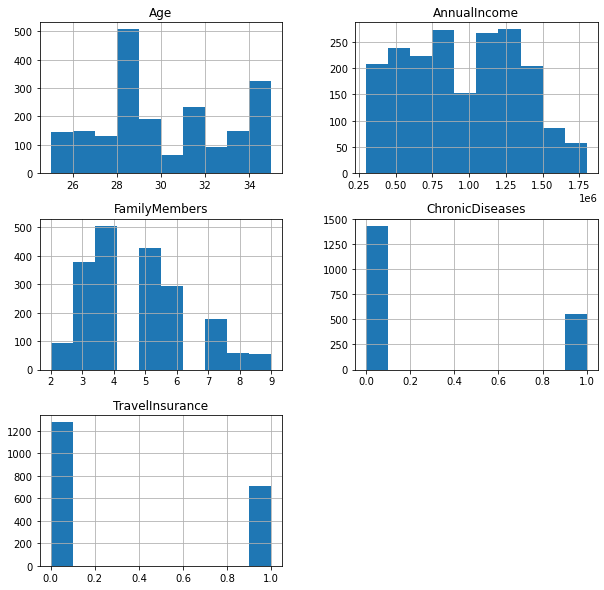

In [3]:
data.hist(figsize=(10,10))

In [4]:
data.shape

(1987, 9)

## Data Analysis

In [5]:
# Data analysis
# Todo: analyze your data here

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1987.0,29.650226,2.913308,25.0,28.0,29.0,32.0,35.0
AnnualIncome,1987.0,932762.959235,376855.684748,300000.0,600000.0,900000.0,1250000.0,1800000.0
FamilyMembers,1987.0,4.752894,1.609650,2.0,4.0,5.0,6.0,9.0
ChronicDiseases,1987.0,0.277806,0.448030,0.0,0.0,0.0,1.0,1.0
TravelInsurance,1987.0,0.357323,0.479332,0.0,0.0,0.0,1.0,1.0


In [8]:
data.describe(include=['object']).T

,count,unique,top,freq
Employment Type,1987,2,Private Sector/Self Employed,1417
GraduateOrNot,1987,2,Yes,1692
FrequentFlyer,1987,2,No,1570
EverTravelledAbroad,1987,2,No,1607


In [9]:
# Check the unique values of the dataset
data.nunique()

Age                    11
Employment Type         2
GraduateOrNot           2
AnnualIncome           30
FamilyMembers           8
ChronicDiseases         2
FrequentFlyer           2
EverTravelledAbroad     2
TravelInsurance         2
dtype: int64

In [10]:
# Get categorical columns and numerical columns
categorical_cols = [feature for feature in data.columns if data[feature].dtype == "O"]
numerical_cols = [feature for feature in data.columns if data[feature].dtype != "O"]

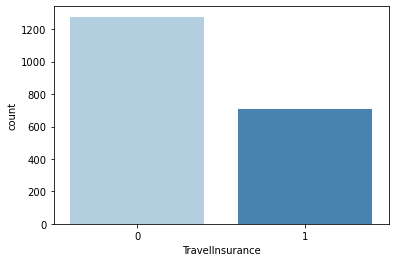

,TravelInsurance
TravelInsurance,
0,1277
1,710


In [11]:
# Visualize the distribution of the target variable
sns.countplot(data=data,x='TravelInsurance',palette="Blues")
plt.show()
data.groupby('TravelInsurance').agg({'TravelInsurance':'count'})

In [12]:
# Visualize by travel insurance and count number of customers
import plotly.express as px
labels = ['Not Purchased', 'Purchased']
values = data['TravelInsurance'].value_counts()

fig = px.pie(data, names=labels, values=values, color_discrete_sequence=['lightblue', 'lightpink'], 
             title='How many people have purchased the insurance?', template='plotly_white')

fig.show()

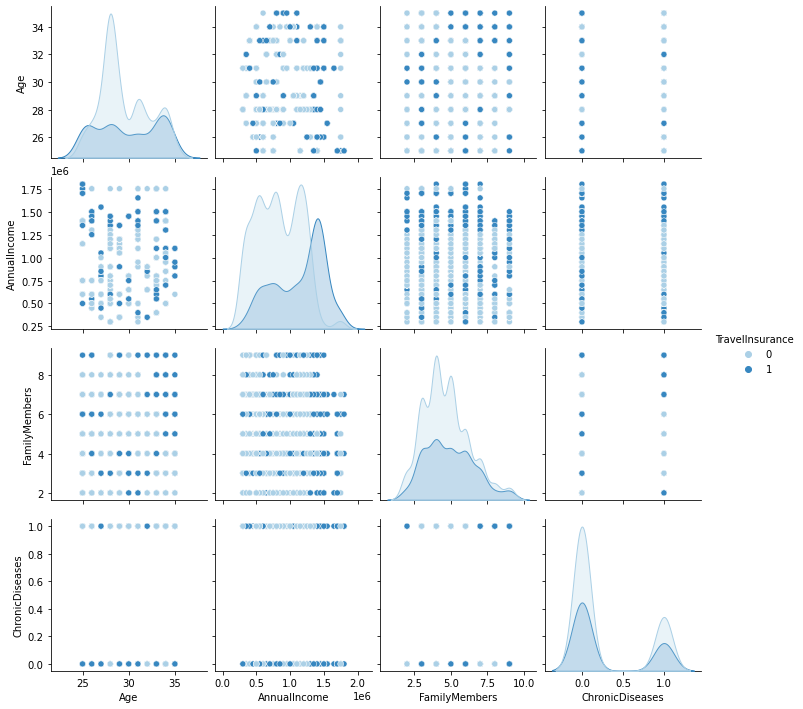

In [13]:
# Pairplot show the correlation of the data
g = sns.pairplot(data, hue="TravelInsurance", palette="Blues")

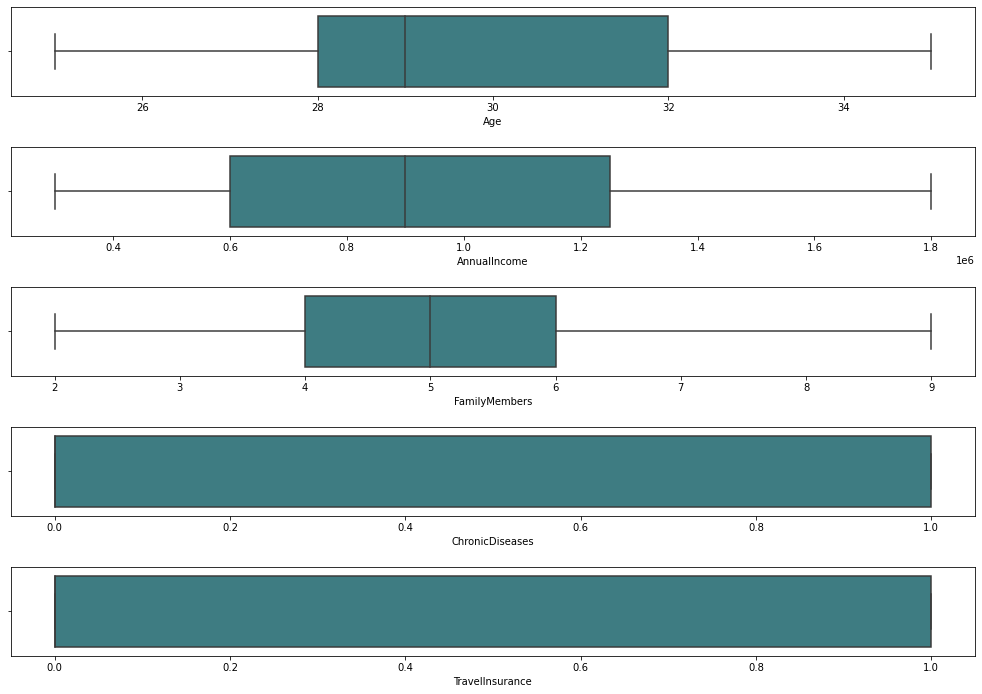

In [14]:
# check outliers 
fig, axes=plt.subplots(len(numerical_cols), 1, figsize=(14, 2*len(numerical_cols)),sharex=False,sharey=False)

for i, column in enumerate(numerical_cols):
    sns.boxplot(x=column,data=data,palette='crest',ax=axes[i])
plt.tight_layout(pad=2.0)

<AxesSubplot:>

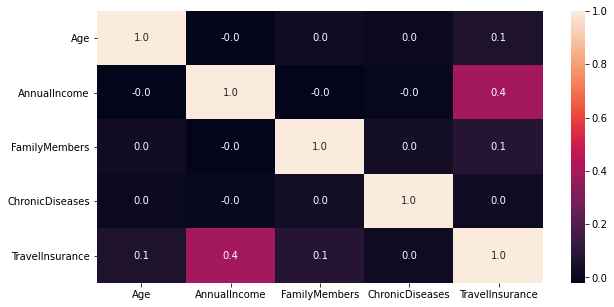

In [15]:
plt.figure(figsize=(10, 5))
sns.heatmap(data.corr(),annot=True,fmt=".1f")

## Preprocessing

In [16]:
def preprocessing_data(df):
    """
    Preprocess your data (eg. Drop null datapoints or fill missing data)
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: preprocess data
    df = df.dropna()
    return df

In [17]:
df = preprocessing_data(data.copy())
df.shape

(1987, 9)

## Feature Engineering

In [18]:
# ham nay dung de chuyen bien category thanh cac bien dang so roi rac
import category_encoders as ce
def ordinal_encode(data):
  """
  :param df: pandas DataFrame
  :return: pandas DataFrame
  """
  encoding_data=data.copy()
  encoder=ce.OrdinalEncoder(encoding_data)
  data_encoded=encoder.fit_transform(encoding_data)
  return data_encoded

In [19]:
df.columns

Index(['Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')

<AxesSubplot:>

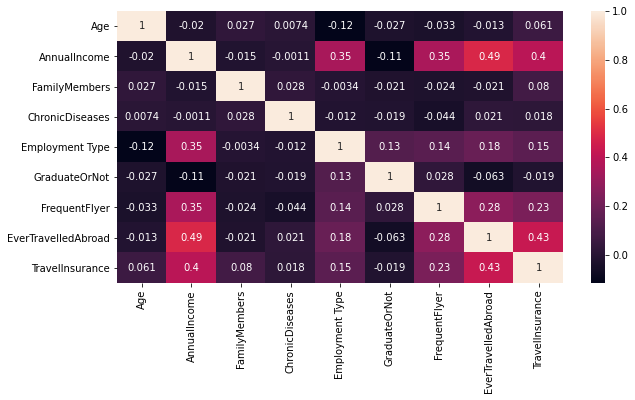

In [20]:
# Heatmap
import seaborn as sns

def apply_feature_engineering(df):
    """
    Apply all feature engineering to transform your data into number
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: Normalize your data
    # extract two dataframe: dataframe with target column and dataframe without it.
    df_without_tg = df.iloc[:,:-1]
    df_tg = df.iloc[:,-1]
    # if target column is object. convert it into number. 
    if df_tg.dtype == 'object':
        df_tg = ordinal_encode(df_tg)

    df_object_columns = df_without_tg.iloc[:, :].select_dtypes(include=['object']).columns
    if len(df_object_columns) != 0:
        # remove all categorical features
        df_obj_columns_removed = df_without_tg.drop(df_object_columns,axis=1)
        # create new object dataframe 
        df_le = df[df_object_columns]
        df_le = ordinal_encode(df_le)
        # concat two dataframe above
        df_new = pd.concat([df_obj_columns_removed, df_le], axis=1)
    
    return pd.concat([df_new,df_tg],axis=1)

df = apply_feature_engineering(df)

plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(),annot=True) # Show heatmap after normalized data

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'AnnualIncome'}>,
        <AxesSubplot:title={'center':'FamilyMembers'}>],
       [<AxesSubplot:title={'center':'ChronicDiseases'}>,
        <AxesSubplot:title={'center':'Employment Type'}>,
        <AxesSubplot:title={'center':'GraduateOrNot'}>],
       [<AxesSubplot:title={'center':'FrequentFlyer'}>,
        <AxesSubplot:title={'center':'EverTravelledAbroad'}>,
        <AxesSubplot:title={'center':'TravelInsurance'}>]], dtype=object)

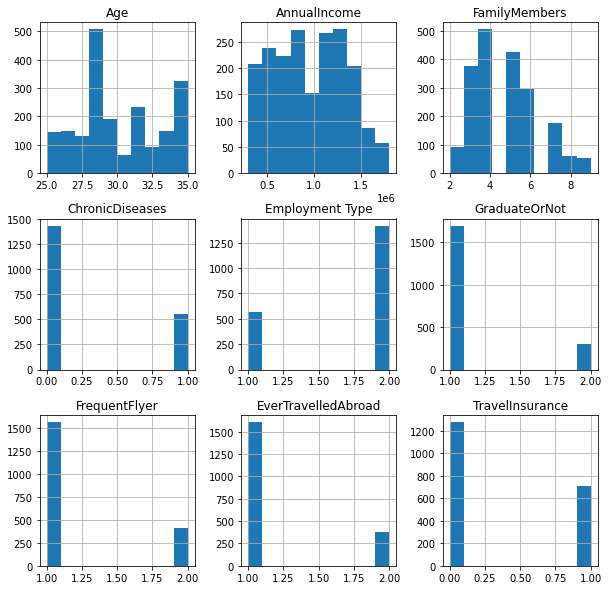

In [21]:
df.hist(figsize=(10,10))

In [22]:
df.describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,Employment Type,GraduateOrNot,FrequentFlyer,EverTravelledAbroad,TravelInsurance
count,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.277806,1.713135,1.148465,1.209864,1.191243,0.357323
std,2.913308,3.768557e+05,1.609650,0.448030,0.452412,0.355650,0.407314,0.393379,0.479332
min,25.000000,3.000000e+05,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000


In [23]:
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    # Todo: Split data into X and y (using sklearn train_test_split). Return two dataframes
    target = df.columns[-1]
    X = df.drop(target, axis=1, inplace=False).values
    y = df[target].values
    return X, y

X, y = prepare_X_y(df)

# Apply machine learning model

## Train-test split

In [24]:
from sklearn.model_selection import train_test_split
# The important thing is that everytime you use 42, you will always get the same output the first time you make the split
RANDOM_STATE = 42
TRAIN_SIZE = 0.8

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

### theo analysis tren thi bo du lieu khong balance lam. nen xu ly imbalance

Synthetic Minority Oversampling Technique or SMOTE is another technique to oversample the minority class. Simply adding duplicate records of minority class often don’t add any new information to the model. In SMOTE new instances are synthesized from the existing data. If we explain it in simple words, SMOTE looks into minority class instances and use k nearest neighbor to select a random nearest neighbor, and a synthetic instance is created randomly in feature space

In [25]:
from imblearn.over_sampling import SMOTE
#from imblearn.under_sampling import SMOTE
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority')
# Fit the model to generate the data.
oversampled_X_train, oversampled_Y_train = sm.fit_resample(trainX, trainY)

## Build SK-learn model

In [26]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import BernoulliNB, ComplementNB, GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA


def build_model(X, y, add_pca=False):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """
    # set the tolerance to a large value to make the example faster
    scaler = StandardScaler()
    gau_nb = GaussianNB()
    pca = PCA()
    # Parameters of pipelines can be set using '__' separated parameter names:
    var_smoothing_values = np.logspace(-4, -9, num=100)
    pca_n_componenets = [i for i in range(3,X.shape[1] + 1)]
    if add_pca == True:
        pipe = Pipeline(steps=[("pca",pca),("scaler", scaler), ("gau_nb", gau_nb)]) 
        param_grid = {
        "pca__n_components": pca_n_componenets,
        'gau_nb__var_smoothing': var_smoothing_values
    }

    else: 
        pipe = Pipeline(steps=[("scaler", scaler), ("gau_nb", gau_nb)])
        param_grid = {
        'gau_nb__var_smoothing': var_smoothing_values
    }

    search = GridSearchCV(pipe, param_grid, cv=5)
    search.fit(X, y)
    return search

def calculate_performance(y_true, y_pred):
    """

    :param y_true: ground truth values
    :param y_pred: predictions
    :return:
    """
    # Todo: return your error value like accuracy, f1score, ...
    print("precision", precision_score(y_true,y_pred))
    print("recall", recall_score(y_true,y_pred))
    print("accuracy", accuracy_score(y_true,y_pred))
    print("F1", f1_score(y_true,y_pred))
    print("Classification report: \n", classification_report(y_true , y_pred))

    # Todo: Only choose one of them as your score for the question 7
    main_score = f1_score(y_true,y_pred)
    return main_score

In [27]:
# train data set
# model add pca progress
model_with_pca_train = build_model(trainX, trainY ,add_pca=True)
# model without pca
model_without_pca_train = build_model(trainX, trainY, add_pca=False)
# model with balanced data
model__with_pca_ba_train = build_model(oversampled_X_train, oversampled_Y_train,add_pca=True)
# model with balanced data without pca
model__without_pca_ba_train = build_model(oversampled_X_train, oversampled_Y_train)

In [28]:
# test data set
# model add pca progress
model_with_pca_test = build_model(testX, testY,add_pca=True)
# model without pca
model_without_pca_test = build_model(testX, testY, add_pca=False)

In [29]:
def compare_train_test_set(model_train,model_test):
    print('TRAIN SET: ')
    print("Best parameters:", model_train.best_params_)
    print("Best Accuracy Score: {:.2f}%".format(model_train.best_score_ * 100))
    print('\n --------------')
    print('TEST SET: ')
    print("Best parameters:", model_test.best_params_)
    print("Best Accuracy Score: {:.2f}%".format(model_test.best_score_ * 100))
    return 

### best hyperparameters and score found during the grid search with PCA

In [30]:
compare_train_test_set(model_with_pca_train, model_with_pca_test)

TRAIN SET: 
Best parameters: {'gau_nb__var_smoothing': 0.0001, 'pca__n_components': 3}
Best Accuracy Score: 77.03%

 --------------
TEST SET: 
Best parameters: {'gau_nb__var_smoothing': 0.0001, 'pca__n_components': 3}
Best Accuracy Score: 78.38%


In [31]:
pred = model_with_pca_train.predict(trainX)
calculate_performance(trainY,pred)

precision 0.7482185273159145
recall 0.5536028119507909
accuracy 0.7734424166142227
F1 0.6363636363636365
Classification report: 
               precision    recall  f1-score   support

           0       0.78      0.90      0.84      1020
           1       0.75      0.55      0.64       569

    accuracy                           0.77      1589
   macro avg       0.77      0.72      0.74      1589
weighted avg       0.77      0.77      0.76      1589



0.6363636363636365

### best hyperparameters and score found during the grid search without PCA

In [32]:
compare_train_test_set(model_without_pca_train, model_without_pca_test)

TRAIN SET: 
Best parameters: {'gau_nb__var_smoothing': 0.0001}
Best Accuracy Score: 75.01%

 --------------
TEST SET: 
Best parameters: {'gau_nb__var_smoothing': 0.0001}
Best Accuracy Score: 72.59%


In [33]:
pred = model_without_pca_train.predict(trainX)
calculate_performance(trainY,pred)

precision 0.7044917257683215
recall 0.523725834797891
accuracy 0.7507866582756451
F1 0.6008064516129034
Classification report: 
               precision    recall  f1-score   support

           0       0.77      0.88      0.82      1020
           1       0.70      0.52      0.60       569

    accuracy                           0.75      1589
   macro avg       0.74      0.70      0.71      1589
weighted avg       0.74      0.75      0.74      1589



0.6008064516129034

tu hai ket qua tren thay tren tap training thi co pca thi nhung metrics co ve cao hon mot ti so voi khong co pca. pca dung de giam chieu giu lai mot so dac trung quan trong ma bo du lieu cua ta thi cung khong co nhieu dac trung. 

### best hyperparameters and score found during the grid search, after handled imbalanced data with PCA

In [34]:
compare_train_test_set(model__with_pca_ba_train, model_with_pca_test)

TRAIN SET: 
Best parameters: {'gau_nb__var_smoothing': 0.0001, 'pca__n_components': 8}
Best Accuracy Score: 67.84%

 --------------
TEST SET: 
Best parameters: {'gau_nb__var_smoothing': 0.0001, 'pca__n_components': 3}
Best Accuracy Score: 78.38%


In [35]:
# Compare on training dataset
pred = model__with_pca_ba_train.predict(oversampled_X_train)
calculate_performance(oversampled_Y_train,pred)

precision 0.7331730769230769
recall 0.5980392156862745
accuracy 0.6901960784313725
F1 0.6587473002159827
Classification report: 
               precision    recall  f1-score   support

           0       0.66      0.78      0.72      1020
           1       0.73      0.60      0.66      1020

    accuracy                           0.69      2040
   macro avg       0.70      0.69      0.69      2040
weighted avg       0.70      0.69      0.69      2040



0.6587473002159827

### best hyperparameters and score found during the grid search, after handled imbalanced data without PCA

In [36]:
compare_train_test_set(model__without_pca_ba_train, model_without_pca_test)

TRAIN SET: 
Best parameters: {'gau_nb__var_smoothing': 0.0001}
Best Accuracy Score: 67.16%

 --------------
TEST SET: 
Best parameters: {'gau_nb__var_smoothing': 0.0001}
Best Accuracy Score: 72.59%


In [37]:
# Compare on training dataset
pred = model__with_pca_ba_train.predict(oversampled_X_train)
calculate_performance(oversampled_Y_train,pred)

precision 0.7331730769230769
recall 0.5980392156862745
accuracy 0.6901960784313725
F1 0.6587473002159827
Classification report: 
               precision    recall  f1-score   support

           0       0.66      0.78      0.72      1020
           1       0.73      0.60      0.66      1020

    accuracy                           0.69      2040
   macro avg       0.70      0.69      0.69      2040
weighted avg       0.70      0.69      0.69      2040



0.6587473002159827

luc dau em oversampling tren toan bo du lieu roi moi chia train, test ket qua metrics kha cao. nhung khong biet co van de gi khong nhung sau khi em oversampling tap train thi theo nhung ket qua tren thi khong oversampling thi no se tot hon. nhung ket qua cua cao oversampling va khong thi co su dung pca thi cao hon.

## Conclusion

#### Which metric is your main metric for this problem and why? What are your scaler, dimensional reduction and naive bayes model as well as their params? (<= 200 words, also input your opinion or conclusion here)
- F1 score, boi vi boi du lieu cua ta khong can bang. nen chon recall hay precision deu khong chinh xac. nhung F1 score no se dieu hoa can bang cua recall va precision.
- Standard scaler
- su dung pca de giam chieu voi cac tham so 3->so cot cua bo du lieu bo di cot target. (do pca hoat dong tu 3 features tro len)
- naive bayes thi chon Gassian vi du lieu bao gom bien roi rac va bien lien tuc. 

In [38]:
def get_conclusion():
    # Todo: Please return your answer, conclusion and opinion right here
    return calculate_performance(oversampled_Y_train, model__with_pca_ba_train.predict(oversampled_X_train))

get_conclusion()

precision 0.7331730769230769
recall 0.5980392156862745
accuracy 0.6901960784313725
F1 0.6587473002159827
Classification report: 
               precision    recall  f1-score   support

           0       0.66      0.78      0.72      1020
           1       0.73      0.60      0.66      1020

    accuracy                           0.69      2040
   macro avg       0.70      0.69      0.69      2040
weighted avg       0.70      0.69      0.69      2040



0.6587473002159827